In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from IPython.display import clear_output
from ipywidgets import interact
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
data = input_data.read_data_sets('./../../data/images/mnist/', one_hot=True)

Extracting ./../../data/images/mnist/train-images-idx3-ubyte.gz
Extracting ./../../data/images/mnist/train-labels-idx1-ubyte.gz
Extracting ./../../data/images/mnist/t10k-images-idx3-ubyte.gz
Extracting ./../../data/images/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
TRAIN = 55000
TEST = 10000
IMG = 64

7: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


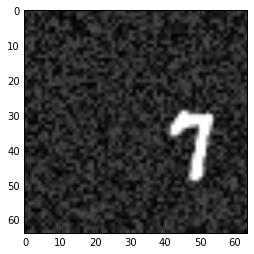

In [90]:
def embed_img(digit):
    # Place image in random position
    #img = np.zeros((IMG, IMG), dtype=np.float32)
    img = np.random.random_sample((IMG, IMG)).astype(np.float32) * .3
    i, j = np.random.randint(IMG-28), np.random.randint(IMG-28)
    img[i:i+28,j:j+28] += digit
    high = img > 1.0
    img[high] = 1
    low = img < 0.0
    img[low] = 0.0
    return img

def random_pair():
    idx = np.random.randint(TRAIN)
    digit = data.train.images[idx].reshape((28,28))
    label = data.train.labels[idx].astype(np.float32)
    
    # Place image in random position
    img = embed_img(digit)
    
    return img, label

def random_test_pair():
    idx = np.random.randint(TEST)
    digit = data.test.images[idx].reshape((28,28))
    label = data.test.labels[idx].astype(np.float32)
    
    # Place image in random position
    img = embed_img(digit)
    
    return img, label

def random_batch(batch):
    batch_imgs = []
    batch_labels = []
    for i in range(batch):
        img, label = random_pair()
        # img = img.reshape(IMG ** 2)
        label = label.reshape(10)
        batch_imgs.append(img)
        batch_labels.append(label)
    return np.array(batch_imgs), np.array(batch_labels)
    
img, label = random_pair()

print('{}: {}'.format(np.argmax(label), label))
f = plt.imshow(img, cmap='gray')

In [91]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.01, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

x = tf.placeholder(tf.float32, (None, IMG, IMG))
y_ = tf.placeholder(tf.float32, (None, 10))

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, (-1, IMG, IMG, 1))

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


# Fully connected layer

W_fc1 = weight_variable([32 * 32 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 32 * 32 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))

train = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [92]:
if 'session' in globals():
    session.close()
    
session = tf.InteractiveSession()
session.run(tf.initialize_all_variables())

In [93]:
# train

for i in range(20000):
    batch_i, batch_l = random_batch(50)
    
    if i%500 == 0:
        train_accuracy = accuracy.eval(feed_dict={x: batch_i, y_: batch_l, keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        
    train.run(feed_dict={x: batch_i, y_: batch_l, keep_prob: 0.5})

step 0, training accuracy 0.16
step 500, training accuracy 0.2
step 1000, training accuracy 0.32
step 1500, training accuracy 0.4
step 2000, training accuracy 0.7
step 2500, training accuracy 0.7
step 3000, training accuracy 0.74
step 3500, training accuracy 0.82
step 4000, training accuracy 0.86
step 4500, training accuracy 0.92
step 5000, training accuracy 0.92
step 5500, training accuracy 0.8
step 6000, training accuracy 0.94
step 6500, training accuracy 0.96
step 7000, training accuracy 0.98
step 7500, training accuracy 0.94
step 8000, training accuracy 0.92
step 8500, training accuracy 0.96
step 9000, training accuracy 0.92
step 9500, training accuracy 0.94
step 10000, training accuracy 0.84
step 10500, training accuracy 0.94
step 11000, training accuracy 0.94
step 11500, training accuracy 0.96
step 12000, training accuracy 0.98
step 12500, training accuracy 0.96
step 13000, training accuracy 0.96
step 13500, training accuracy 0.92
step 14000, training accuracy 0.88
step 14500, tr

In [94]:
# save weights

saver = tf.train.Saver(tf.trainable_variables())
saver.save(session, './trainable.ckpt')

print('saved')

saved


In [9]:
# restore

saver = tf.train.Saver(tf.trainable_variables())
saver.restore(session, './trainable.ckpt')
print('restored')

NotFoundError: Tensor name "Variable_8" not found in checkpoint files ./trainable.ckpt
	 [[Node: save/restore_slice_8 = RestoreSlice[dt=DT_FLOAT, preferred_shard=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/restore_slice_8/tensor_name, save/restore_slice_8/shape_and_slice)]]
	 [[Node: save/restore_slice_9/_2 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_89_save/restore_slice_9", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
Caused by op u'save/restore_slice_8', defined at:
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-a6c009bb0ed6>", line 3, in <module>
    saver = tf.train.Saver(tf.trainable_variables())
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 784, in __init__
    restore_sequentially=restore_sequentially)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 454, in build
    filename_tensor, vars_to_save, restore_sequentially, reshape)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 212, in _AddRestoreOps
    values = self.restore_op(filename_tensor, vs, preferred_shard)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 127, in restore_op
    preferred_shard=preferred_shard)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/tensorflow/python/ops/io_ops.py", line 193, in _restore_slice
    preferred_shard, name=name)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 271, in _restore_slice
    preferred_shard=preferred_shard, name=name)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/tensorflow/python/ops/op_def_library.py", line 655, in apply_op
    op_def=op_def)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2040, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/jon/miniconda3/envs/mlenv2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1087, in __init__
    self._traceback = _extract_stack()


In [95]:
W_conv1.eval()

array([[[[  3.33550572e-02,   8.50145742e-02,  -9.57348868e-02,
            5.95744029e-02,   8.16578120e-02,   7.37139285e-02,
            7.51813427e-02,   5.92797250e-02,   5.81528991e-02,
           -5.67074232e-02,  -5.88633306e-02,  -7.92884361e-03,
           -1.23352222e-02,  -9.04419124e-02,   1.09892646e-02,
           -3.47818364e-03,   8.80164653e-03,   6.60246462e-02,
           -4.11297418e-02,  -8.69793817e-02,  -7.72215948e-02,
           -7.52088428e-03,  -3.43735367e-02,  -1.40436776e-02,
           -1.56929269e-02,  -5.59019186e-02,  -6.49733469e-02,
           -1.91170461e-02,   6.53066039e-02,   3.90784070e-02,
            7.28460550e-02,  -8.48254189e-02]],

        [[  2.23533046e-02,   1.02456510e-02,  -6.02372214e-02,
            6.80447817e-02,   4.94212285e-02,   7.33160302e-02,
            6.09437376e-02,   5.28239086e-02,   9.98418927e-02,
           -8.86253193e-02,  -5.32879233e-02,  -5.97288199e-02,
           -5.00721894e-02,  -3.13998535e-02,   3.98089

label: 7 y_conv: 9


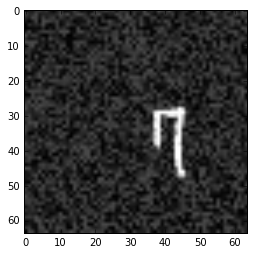

In [185]:
img, label = random_test_pair()

out = y_conv.eval(feed_dict={x: [img], keep_prob: 1.0})

print('label: {} y_conv: {}'.format(np.argmax(label), np.argmax(out)))
f = plt.imshow(img, cmap='gray')

In [128]:
# Randomly translate each image in the test data and get accuracy

test_batch = []
test_labels = []
for i in range(2000):
    digit = data.test.images[i].reshape(28, 28)
    
    img = embed_img(digit)
    test_batch.append(img)
    test_labels.append(data.test.labels[i])


    
print("test accuracy %g"%accuracy.eval(feed_dict={x: test_batch, y_: test_labels, keep_prob: 1.0}))

test accuracy 0.958


(5, 5, 1, 32)


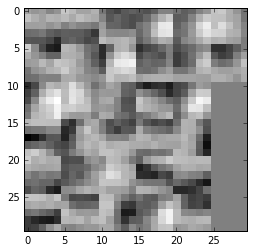

In [166]:
# Visualize all kernels at a certain level

def visualize_W(W):
    print(W.shape)
    side = int(np.ceil(W.shape[0] * np.sqrt(W.shape[3]))) + 1
    img = np.zeros((side, side))
    k = W.shape[0]
    
    io, jo = 0, 0
    for i in range(W.shape[3]):
        img[io:io+k,jo:jo+k] = W[:,:,0,i]
        io += k
        if io > img.shape[0]-k:
            io = 0
            jo += k
            
    plt.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
    
visualize_W(W_conv1.eval())

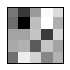

In [167]:
We = W_conv2.eval()
def step_W2(ki, k):
    plt.figure(figsize=(1,1))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(We[:,:,ki, k], interpolation='nearest', cmap=plt.cm.gray)

interact(step_W2, ki=(0,31,1), k=(0,63,1))

In [175]:
# Try to generate a 6 randomly

def gen_digit(index):
    e = np.zeros((10), dtype=np.float32)
    e[index] = 1.0
    e = e.reshape(1, 10)
    
    img = np.random.random_sample((IMG, IMG)).astype(np.float32)
    img = img.reshape(1, IMG, IMG)
    
    out = cross_entropy.eval(session=session, feed_dict={x: img, y_:e, keep_prob: 1.0})
    print(out)
    
gen_digit(2)

nan
